In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display
import cv2 as cv

In [2]:
import pythonApps as app

In [3]:
imgInput = cv.imread("../dat/cable.png", cv.IMREAD_GRAYSCALE)
(numRows, numCols) = imgInput.shape

# Attribute filter: direct filter

In [16]:
imgDirectFilter_area = app.executeDirectFilter(imgInput, numRows, numCols, attr_name='area', attr_value=100)
imgDirectFilter_maxDist = app.executeDirectFilter(imgInput, numRows, numCols, attr_name='maxDist', attr_value=100)

In [40]:
imgDirectFilter_inertia = app.executeDirectFilter(imgInput, numRows, numCols, attr_name='inertia', attr_value=5000000)


Text(0.5, 1.0, 'direct filter: maxDist')

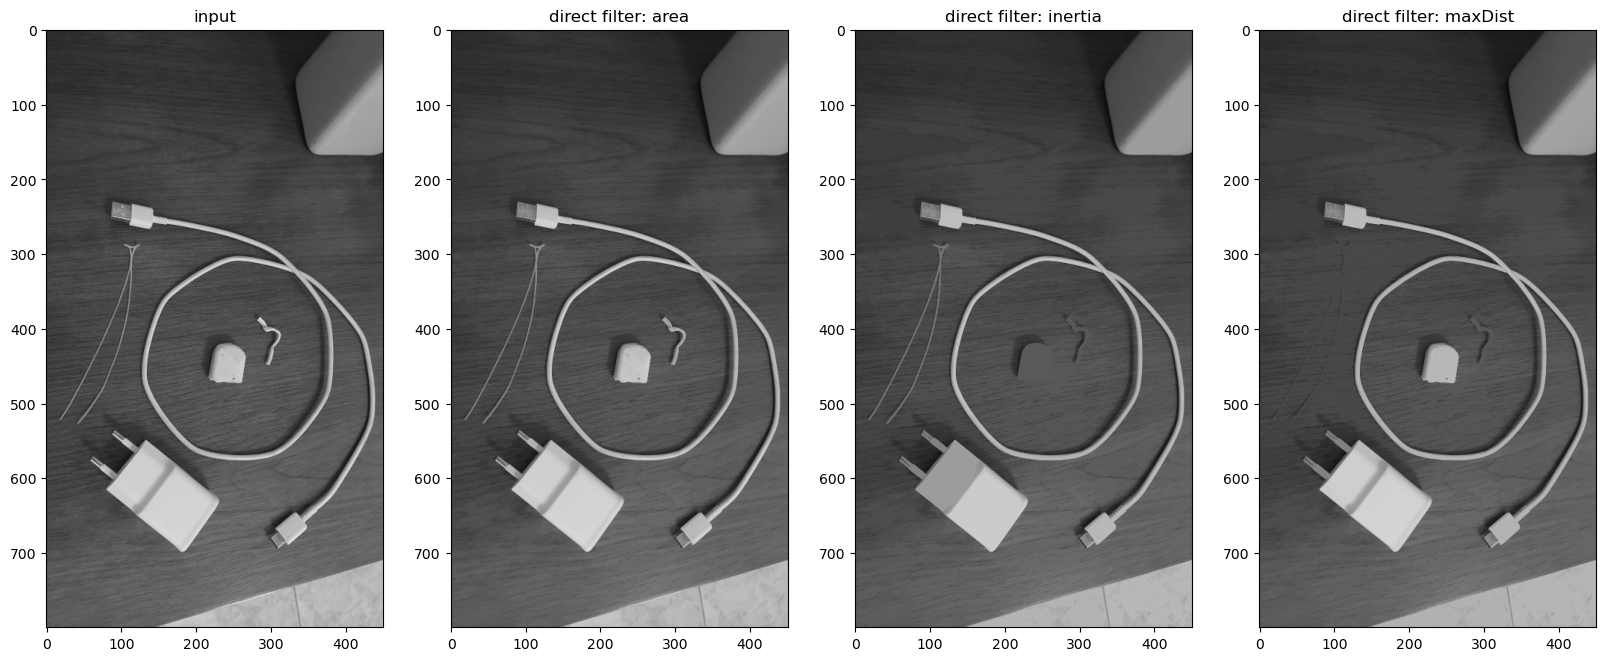

In [42]:
plt.figure(figsize=(20,16))
plt.subplot(1,4,1)
plt.imshow(imgInput, cmap='gray', vmax=255, vmin=0)
plt.title('input')

plt.subplot(1,4,2)
plt.imshow(imgDirectFilter_area.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('direct filter: area')

plt.subplot(1,4,3)
plt.imshow(imgDirectFilter_inertia.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('direct filter: inertia')

plt.subplot(1,4,4)
plt.imshow(imgDirectFilter_maxDist.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('direct filter: maxDist')

# Extinction Filter

In [12]:
imgExtFilter_area = app.executeExtinctionFilter(imgInput, numRows, numCols, attr_name='area', nleaves=10)
imgExtFilter_inertia = app.executeExtinctionFilter(imgInput, numRows, numCols, attr_name='inertia', nleaves=10)
imgExtFilter_maxDist = app.executeExtinctionFilter(imgInput, numRows, numCols, attr_name='maxDist', nleaves=10)

Text(0.5, 1.0, 'extinction maxDist filter')

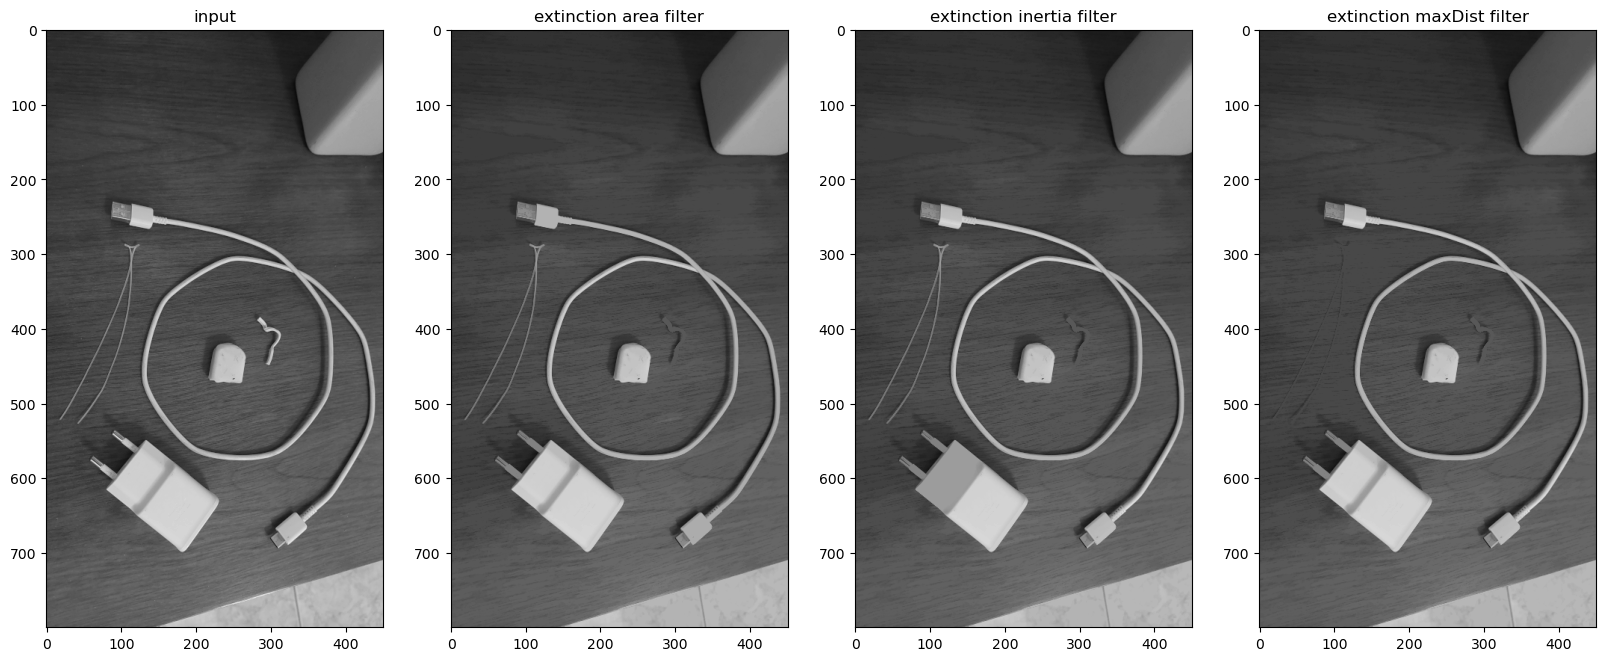

In [9]:
plt.figure(figsize=(20,16))
plt.subplot(1,4,1)
plt.imshow(imgInput, cmap='gray', vmax=255, vmin=0)
plt.title('input')

plt.subplot(1,4,2)
plt.imshow(imgExtFilter_area.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('extinction area filter')

plt.subplot(1,4,3)
plt.imshow(imgExtFilter_inertia.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('extinction inertia filter')

plt.subplot(1,4,4)
plt.imshow(imgExtFilter_maxDist.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('extinction maxDist filter')

# Ultimate maxDist opening 

In [64]:
maxCriterion = 200
deltaMSER = 15
imgContrast, imgAssociated = app.executeUAO(imgInput, numRows, numCols, maxCriterion, deltaMSER, 'maxDist')

colors = [ [random.randint(0, 255) for _ in range(3)] for _ in range(0, np.max(imgAssociated)+1)]
imgRGBContrast = [(0,0,0) if p == 0 else colors[p] for p in imgAssociated]

Text(0.5, 1.0, 'associated indexes')

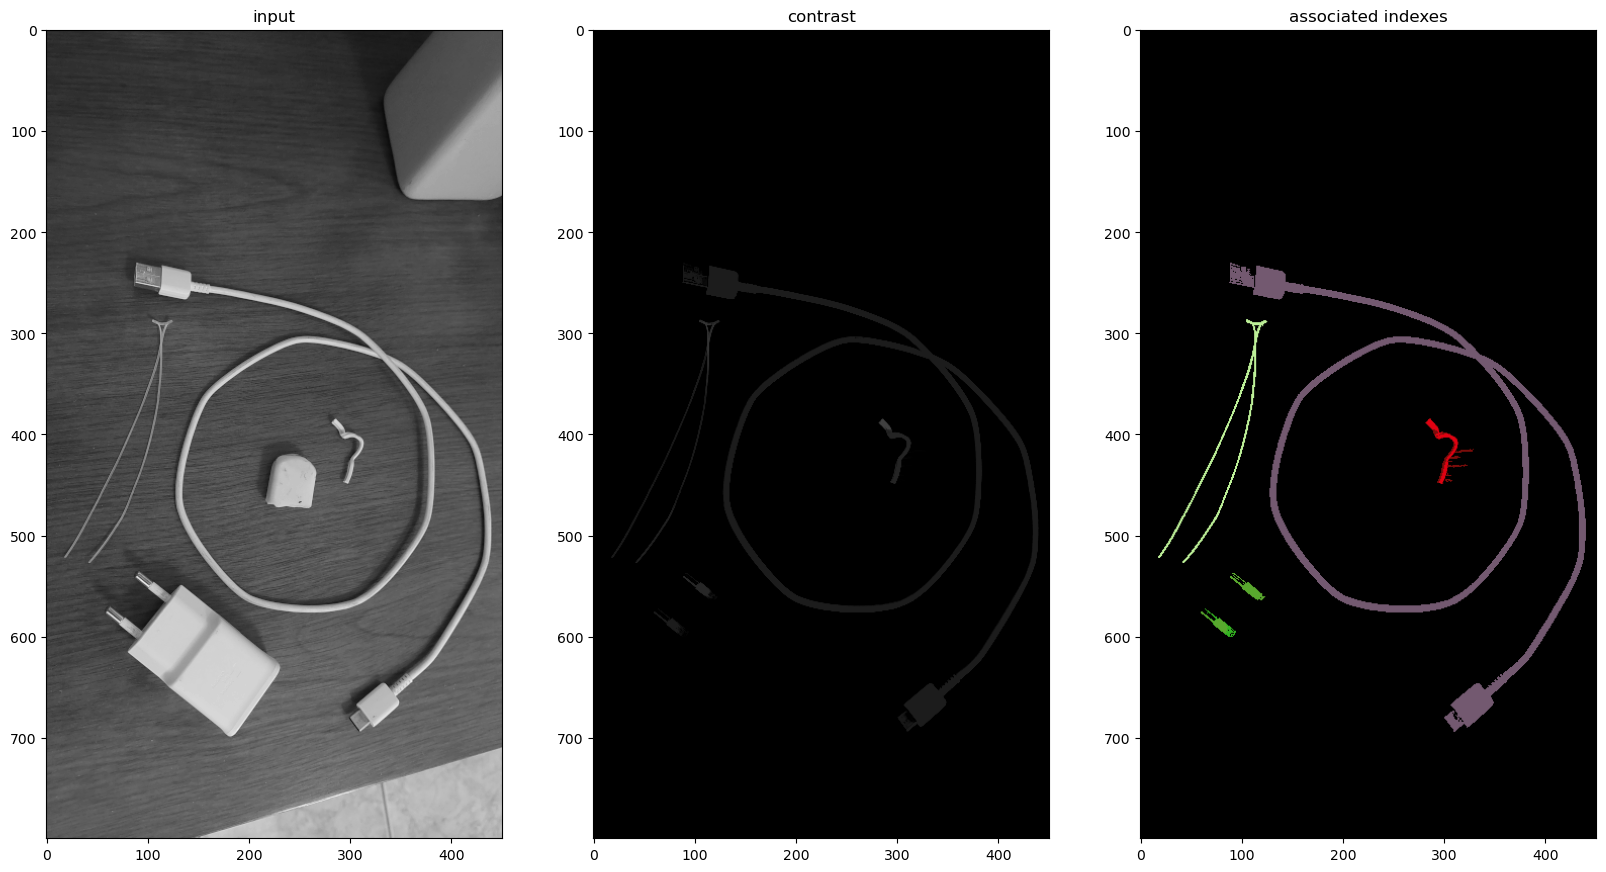

In [65]:
plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.imshow(imgInput, cmap='gray', vmax=255, vmin=0)
plt.title('input')

plt.subplot(1,3,2)
plt.imshow(imgContrast.reshape(numRows, numCols), cmap='gray', vmax=255, vmin=0)
plt.title('contrast')

plt.subplot(1,3,3)
plt.imshow(np.array(imgRGBContrast).reshape(numRows, numCols, 3), vmax=255, vmin=0)
plt.title('associated indexes')